Author: GU Tianyi

Email: gutianyi0727@gmail.com

In [1]:
import pandas as  pd
import numpy as np
import warnings 
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import datetime 
from scipy import stats
import pandas_profiling
%matplotlib inline

In [2]:
data_prefix_path = '/home/q/Documents/competation/competitions/datasets/Purchase Redemption Data/'

In [3]:
data_balance = pd.read_csv(data_prefix_path+'user_balance_table.csv')

In [4]:
data_balance['date'] = pd.to_datetime(data_balance['report_date'], format= "%Y%m%d")

In [5]:
data_balance.head()

,user_id,report_date,tBalance,yBalance,total_purchase_amt,direct_purchase_amt,purchase_bal_amt,purchase_bank_amt,total_redeem_amt,consume_amt,transfer_amt,tftobal_amt,tftocard_amt,share_amt,category1,category2,category3,category4,date
0,1,20140805,20385,20383,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN,2014-08-05
1,1,20140808,20391,20389,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN,2014-08-08
2,1,20140811,20397,20395,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN,2014-08-11
3,1,20140814,20403,20401,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN,2014-08-14
4,1,20140817,20409,20407,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN,2014-08-17


## 时间序列分析

In [6]:
# 聚合时间数据

total_balance = data_balance.groupby(['date'])['total_purchase_amt','total_redeem_amt'].sum().reset_index()
total_balance

,date,total_purchase_amt,total_redeem_amt
0,2013-07-01,32488348,5525022
1,2013-07-02,29037390,2554548
2,2013-07-03,27270770,5953867
3,2013-07-04,18321185,6410729
4,2013-07-05,11648749,2763587
...,...,...,...
422,2014-08-27,302194801,468164147
423,2014-08-28,245082751,297893861
424,2014-08-29,267554713,273756380
425,2014-08-30,199708772,196374134


In [7]:
# 生成测试集区段数据

start = datetime.datetime(2014,9,1)
testdata = []
while start != datetime.datetime(2014,10,1):
    temp = [start, np.nan, np.nan]
    testdata.append(temp)
    start += datetime.timedelta(days = 1)
testdata = pd.DataFrame(testdata)
testdata.columns = total_balance.columns
testdata.head()

,date,total_purchase_amt,total_redeem_amt
0,2014-09-01,NaN,NaN
1,2014-09-02,NaN,NaN
2,2014-09-03,NaN,NaN
3,2014-09-04,NaN,NaN
4,2014-09-05,NaN,NaN


In [8]:
# 拼接数据集

total_balance = pd.concat([total_balance, testdata], axis = 0)

In [9]:
total_balance['day'] = data_balance['date'].dt.day
total_balance['month'] = data_balance['date'].dt.month
total_balance['year'] = data_balance['date'].dt.year
total_balance['week'] = data_balance['date'].dt.week
total_balance['weekday'] = data_balance['date'].dt.weekday
total_balance

,date,total_purchase_amt,total_redeem_amt,day,month,year,week,weekday
0,2013-07-01,32488348.0,5525022.0,5,8,2014,32,1
1,2013-07-02,29037390.0,2554548.0,8,8,2014,32,4
2,2013-07-03,27270770.0,5953867.0,11,8,2014,33,0
3,2013-07-04,18321185.0,6410729.0,14,8,2014,33,3
4,2013-07-05,11648749.0,2763587.0,17,8,2014,33,6
...,...,...,...,...,...,...,...,...
25,2014-09-26,NaN,NaN,13,7,2014,28,6
26,2014-09-27,NaN,NaN,10,7,2014,28,3
27,2014-09-28,NaN,NaN,7,7,2014,28,0
28,2014-09-29,NaN,NaN,4,7,2014,27,4


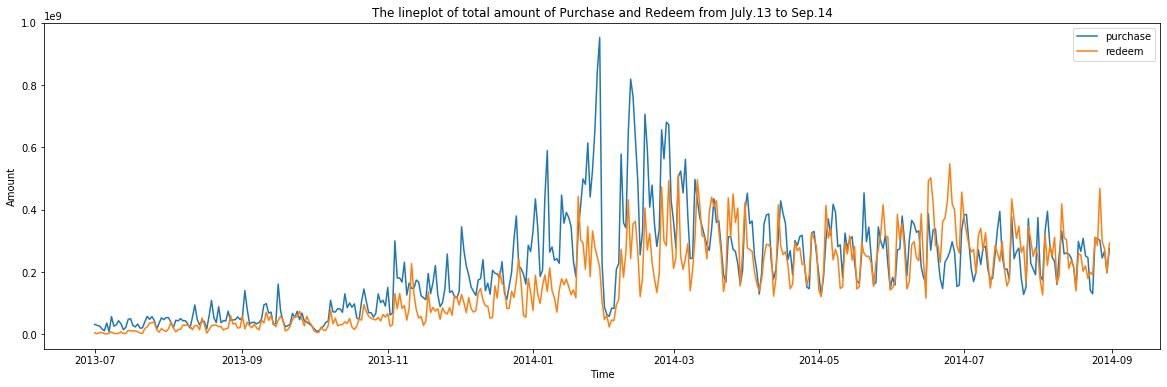

In [10]:
import matplotlib.pylab as plt
import warnings
warnings.filterwarnings('ignore')
# 画出每日总购买与赎回量的时间序列图

plt.figure(figsize=(20,6))
plt.plot(total_balance['date'], total_balance['total_purchase_amt'],label='purchase')
plt.plot(total_balance['date'], total_balance['total_redeem_amt'],label='redeem')

plt.legend(loc='best')
plt.title("The lineplot of total amount of Purchase and Redeem from July.13 to Sep.14")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

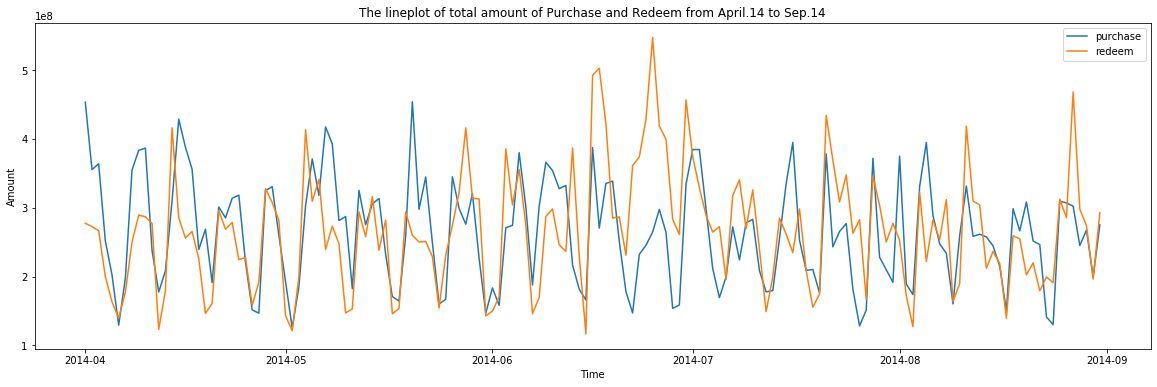

In [11]:
# 画出4月份以后的时间序列图

total_balance_1 = total_balance[total_balance['date'] >= datetime.date(2014,4,1)]
plt.figure(figsize=(20,6))
plt.plot(total_balance_1['date'], total_balance_1['total_purchase_amt'],label='purchase')
plt.plot(total_balance_1['date'], total_balance_1['total_redeem_amt'],label='redeem')
plt.legend()
plt.title("The lineplot of total amount of Purchase and Redeem from April.14 to Sep.14")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

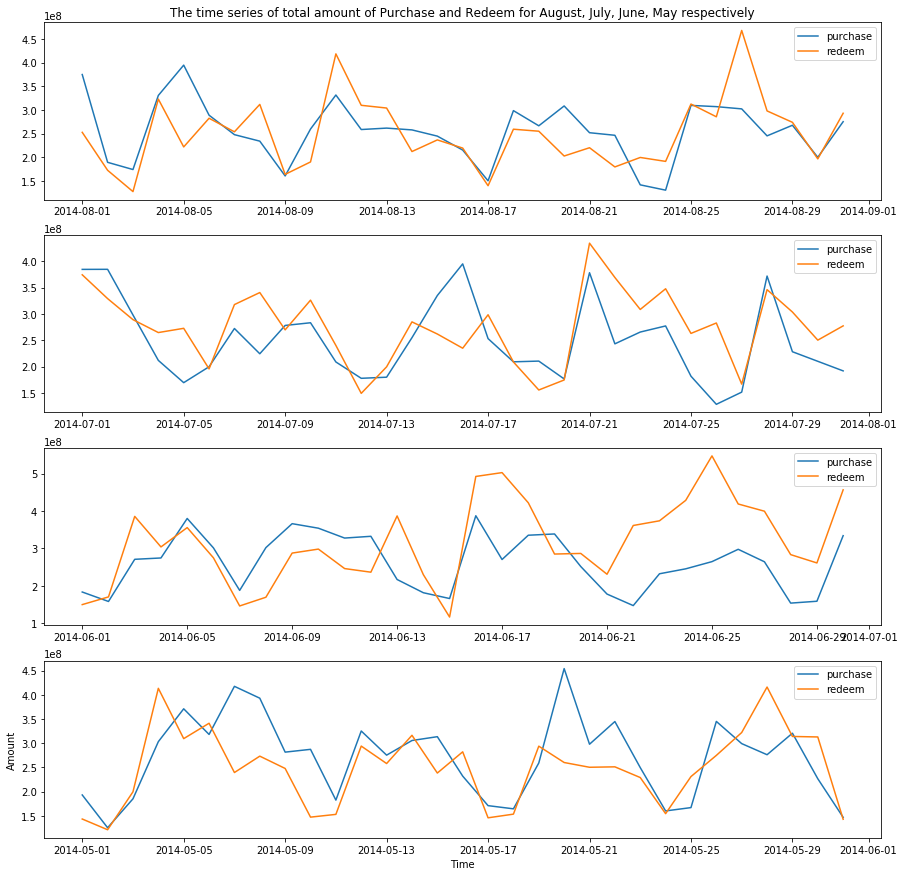

In [12]:
# 分别画出每个月中每天购买赎回量的时间序列图

fig = plt.figure(figsize=(15,15))

plt.subplot(4,1,1)
plt.title("The time series of total amount of Purchase and Redeem for August, July, June, May respectively")

total_balance_2 = total_balance[total_balance['date'] >= datetime.date(2014,8,1)]
plt.plot(total_balance_2['date'], total_balance_2['total_purchase_amt'],label='purchase')
plt.plot(total_balance_2['date'], total_balance_2['total_redeem_amt'],label='redeem')
plt.legend()


total_balance_3 = total_balance[(total_balance['date'] >= datetime.date(2014,7,1)) & (total_balance['date'] < datetime.date(2014,8,1))]
plt.subplot(4,1,2)
plt.plot(total_balance_3['date'], total_balance_3['total_purchase_amt'],label='purchase')
plt.plot(total_balance_3['date'], total_balance_3['total_redeem_amt'],label='redeem')
plt.legend()


total_balance_4 = total_balance[(total_balance['date'] >= datetime.date(2014,6,1)) & (total_balance['date'] < datetime.date(2014,7,1))]
plt.subplot(4,1,3)
plt.plot(total_balance_4['date'], total_balance_4['total_purchase_amt'],label='purchase')
plt.plot(total_balance_4['date'], total_balance_4['total_redeem_amt'],label='redeem')
plt.legend()


total_balance_5 = total_balance[(total_balance['date'] >= datetime.date(2014,5,1)) & (total_balance['date'] < datetime.date(2014,6,1))]
plt.subplot(4,1,4)
plt.plot(total_balance_5['date'], total_balance_5['total_purchase_amt'],label='purchase')
plt.plot(total_balance_5['date'], total_balance_5['total_redeem_amt'],label='redeem')
plt.legend()

plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


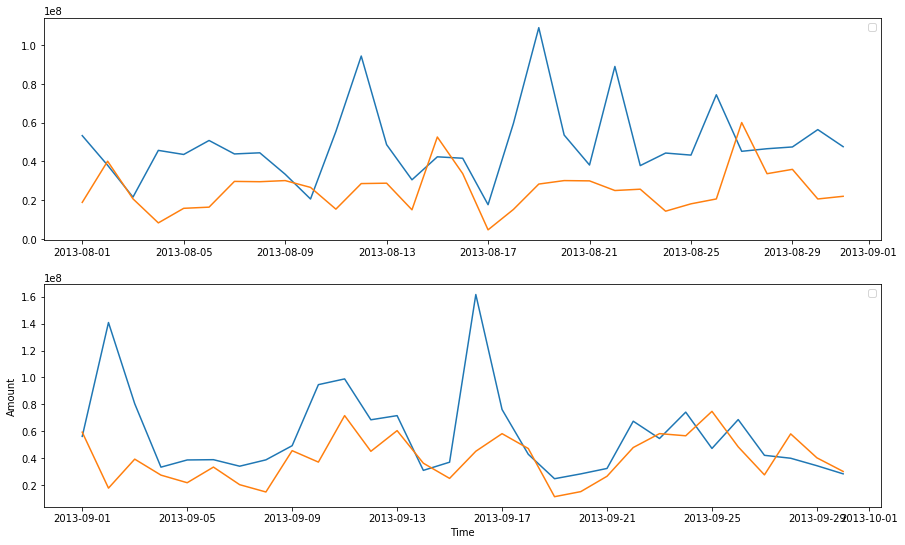

In [13]:

# 分别画出13年8月与9月每日购买赎回量的时序图

fig = plt.figure(figsize=(15,9))

total_balance_last8 = total_balance[(total_balance['date'] >= datetime.date(2013,8,1)) & (total_balance['date'] < datetime.date(2013,9,1))]
plt.subplot(2,1,1)
plt.plot(total_balance_last8['date'], total_balance_last8['total_purchase_amt'])
plt.plot(total_balance_last8['date'], total_balance_last8['total_redeem_amt'])
plt.legend()

total_balance_last9 = total_balance[(total_balance['date'] >= datetime.date(2013,9,1)) & (total_balance['date'] < datetime.date(2013,10,1))]
plt.subplot(2,1,2)
plt.plot(total_balance_last9['date'], total_balance_last9['total_purchase_amt'])
plt.plot(total_balance_last9['date'], total_balance_last9['total_redeem_amt'])
plt.legend()

plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

## 翌日特征分析